### Library

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Module
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
import ssl
import os
from torchvision import datasets, transforms, models
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

Cloning into 'ants_and_bees'...
Updating files:  77% (311/400)
Updating files:  78% (312/400)
Updating files:  79% (316/400)
Updating files:  80% (320/400)
Updating files:  81% (324/400)
Updating files:  82% (328/400)
Updating files:  83% (332/400)
Updating files:  84% (336/400)
Updating files:  85% (340/400)
Updating files:  86% (344/400)
Updating files:  87% (348/400)
Updating files:  88% (352/400)
Updating files:  89% (356/400)
Updating files:  90% (360/400)
Updating files:  91% (364/400)
Updating files:  92% (368/400)
Updating files:  93% (372/400)
Updating files:  94% (376/400)
Updating files:  95% (380/400)
Updating files:  96% (384/400)
Updating files:  97% (388/400)
Updating files:  98% (392/400)
Updating files:  99% (396/400)
Updating files: 100% (400/400)
Updating files: 100% (400/400), done.


In [4]:
!ls data/ants_and_bees/train/ants

0013035.jpg
1030023514_aad5c608f9.jpg
1095476100_3906d8afde.jpg
1099452230_d1949d3250.jpg
116570827_e9c126745d.jpg
1225872729_6f0856588f.jpg
1262877379_64fcada201.jpg
1269756697_0bce92cdab.jpg
1286984635_5119e80de1.jpg
132478121_2a430adea2.jpg
1360291657_dc248c5eea.jpg
1368913450_e146e2fb6d.jpg
1473187633_63ccaacea6.jpg
148715752_302c84f5a4.jpg
1489674356_09d48dde0a.jpg
149244013_c529578289.jpg
150801003_3390b73135.jpg
150801171_cd86f17ed8.jpg
154124431_65460430f2.jpg
162603798_40b51f1654.jpg
1660097129_384bf54490.jpg
167890289_dd5ba923f3.jpg
1693954099_46d4c20605.jpg
175998972.jpg
178538489_bec7649292.jpg
1804095607_0341701e1c.jpg
1808777855_2a895621d7.jpg
188552436_605cc9b36b.jpg
1917341202_d00a7f9af5.jpg
1924473702_daa9aacdbe.jpg
196057951_63bf063b92.jpg
196757565_326437f5fe.jpg
201558278_fe4caecc76.jpg
201790779_527f4c0168.jpg
2019439677_2db655d361.jpg
207947948_3ab29d7207.jpg
20935278_9190345f6b.jpg
224655713_3956f7d39a.jpg
2265824718_2c96f485da.jpg
2265825502_fff99cfd2d.jpg
22695

### Download Path

In [10]:
train_DataPath = os.path.join(os.getcwd(),'Data', 'ants_and_bees', 'train')
validation_DataPath = os.path.join(os.getcwd(),'Data', 'ants_and_bees', 'val')

### Load  - Transoform - Normalize MINST Dateset

#### Data Augmentation

In [11]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)) ,
    transforms.RandomHorizontalFlip(), # Augmenetaion Flib Images
    # transforms.RandomRotation(10),
    transforms.RandomAffine(degrees = 0, shear = 10, scale = (0.5, 1.2)),
    transforms.ColorJitter(brightness = 1, contrast = 1, saturation = 1),
    transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [14]:
transform = transforms.Compose([transforms.Resize((224, 224)) , transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.ImageFolder(root = train_DataPath, transform = transform_train)
validation_dataset = datasets.ImageFolder(root = validation_DataPath, transform = transform)

In [15]:
len(training_dataset), len(validation_dataset)

(244, 153)

### Prepare - Shuffle Data Batches

In [16]:
training_loader = DataLoader(dataset = training_dataset, shuffle = True, batch_size = 20)
validation_loader = DataLoader(dataset = validation_dataset, shuffle = True, batch_size = 20)

#### Transofrom Tesnor Image
- Tensor Image Of Shape (1, 28, 28) to (28, 28, 1)
- Remove Normalization
- Set Value Range From 0 -> 1 Instead Of -1 -> 1

In [17]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy() # Get Clone From The Tensor And Transfer To Numpy Array
    image = image.transpose(1, 2, 0) # Fix ARray Shape From (1, 28, 28) to (28, 28, 1) To Be Feeded Well To The Network ( Model )
    #print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # Remove Normalization
    image = image.clip(0, 1) # Clip Every -1 to 0 and Every 1 to 1 In The Array
    return image

### Load Data In Batches

In [18]:
dataIter = iter(training_loader) # Move Through Data Batches 
images, labels = next(dataIter) #( Load Batche One By One Mean Load Every 100 Image )

In [19]:
valdataIter = iter(validation_loader) # Move Through Data Batches 
vimages, vlabels = next(valdataIter) #( Load Batche One By One Mean Load Every 100 Image )

### Plot First 20 Image

In [20]:
training_classes = ['ant', 'bee']

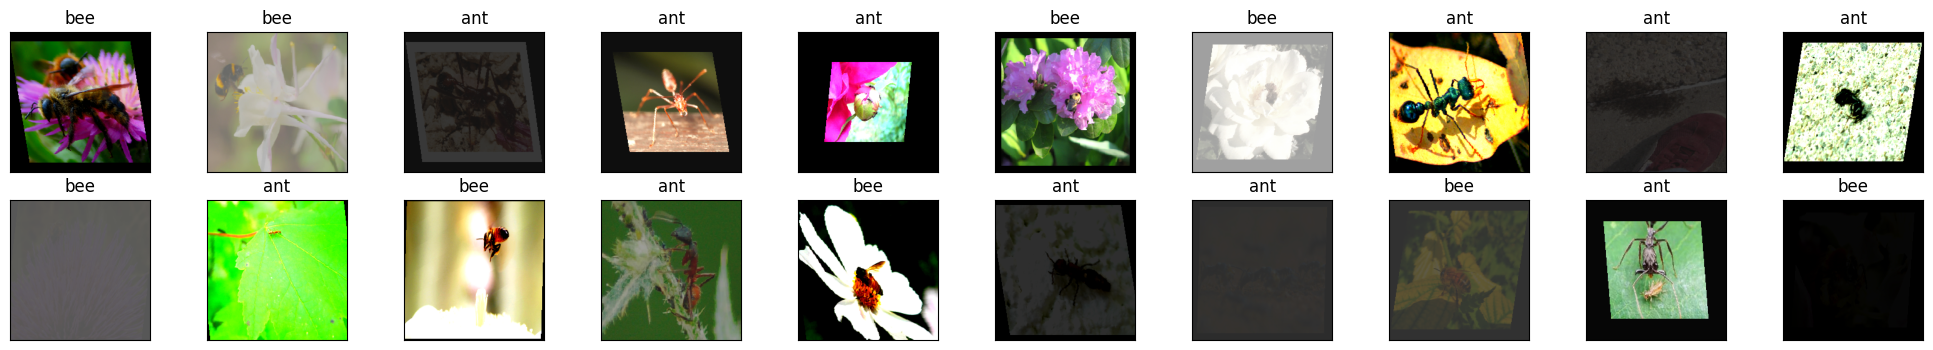

In [21]:
fig = plt.figure(figsize = (25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks = [], yticks = [])
    plt.imshow(im_convert(images[idx]))
    #ax.set_title(labels[idx].item())
    ax.set_title(training_classes[labels[idx].item()])

In [22]:
validtion_classes = ['ant', 'bee']

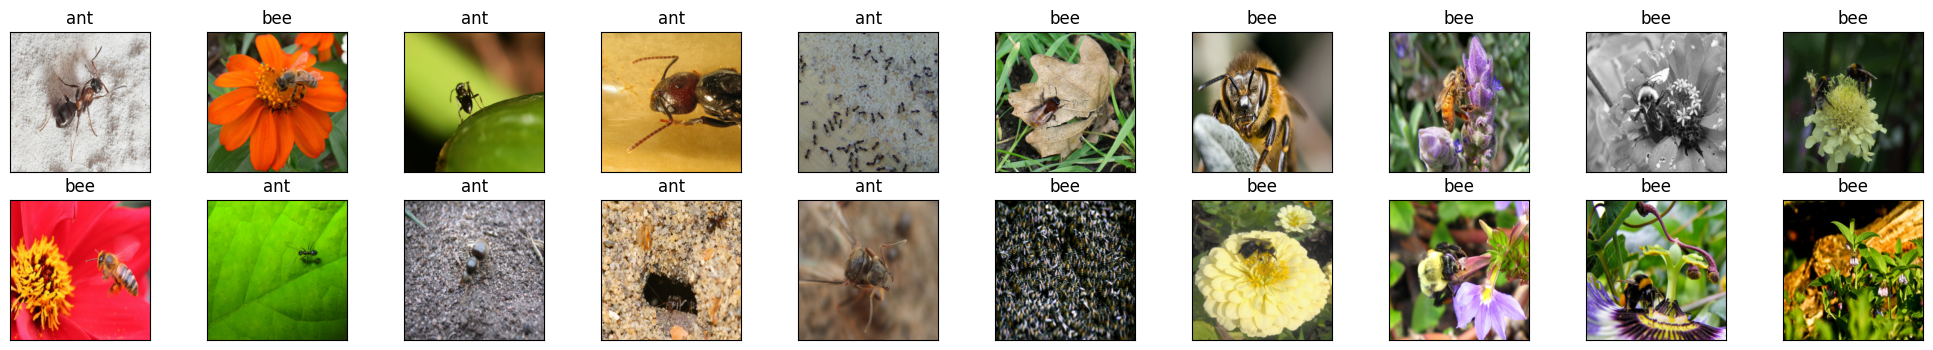

In [23]:
fig = plt.figure(figsize = (25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks = [], yticks = [])
    plt.imshow(im_convert(vimages[idx]))
    #ax.set_title(vlabels[idx].item())
    ax.set_title(validtion_classes[vlabels[idx].item()])

### Create Model

In [25]:
# model = models.alexnet(pretrained=True)
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\moham/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


In [38]:
#model.state_dict()

In [26]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─ReLU: 2-2                         --
|    └─Conv2d: 2-3                       36,928
|    └─ReLU: 2-4                         --
|    └─MaxPool2d: 2-5                    --
|    └─Conv2d: 2-6                       73,856
|    └─ReLU: 2-7                         --
|    └─Conv2d: 2-8                       147,584
|    └─ReLU: 2-9                         --
|    └─MaxPool2d: 2-10                   --
|    └─Conv2d: 2-11                      295,168
|    └─ReLU: 2-12                        --
|    └─Conv2d: 2-13                      590,080
|    └─ReLU: 2-14                        --
|    └─Conv2d: 2-15                      590,080
|    └─ReLU: 2-16                        --
|    └─MaxPool2d: 2-17                   --
|    └─Conv2d: 2-18                      1,180,160
|    └─ReLU: 2-19                        --
|    └─Conv2d: 2-20              

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─ReLU: 2-2                         --
|    └─Conv2d: 2-3                       36,928
|    └─ReLU: 2-4                         --
|    └─MaxPool2d: 2-5                    --
|    └─Conv2d: 2-6                       73,856
|    └─ReLU: 2-7                         --
|    └─Conv2d: 2-8                       147,584
|    └─ReLU: 2-9                         --
|    └─MaxPool2d: 2-10                   --
|    └─Conv2d: 2-11                      295,168
|    └─ReLU: 2-12                        --
|    └─Conv2d: 2-13                      590,080
|    └─ReLU: 2-14                        --
|    └─Conv2d: 2-15                      590,080
|    └─ReLU: 2-16                        --
|    └─MaxPool2d: 2-17                   --
|    └─Conv2d: 2-18                      1,180,160
|    └─ReLU: 2-19                        --
|    └─Conv2d: 2-20              

#### Freeze Part Of Model ( Stop Gradient )

In [27]:
for param in model.features.parameters():
    param.requires_grad = False

#### Since Our Last result Will be 2 must replace last layer with newaly configuration

In [28]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
last_lay_n_inputs = model.classifier[6].in_features
new_last_layer = nn.Linear(in_features=last_lay_n_inputs, out_features=len(training_classes))
model.classifier[6] = new_last_layer

In [30]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [31]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Loss Function , Optimizer

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

### Train The Model

In [33]:
epochs = 5
running_loss_history = []
running_correct_history = []
val_running_loss_history = []
val_running_correct_history = []

for epoch in range(epochs):
    running_loss = 0.0
    running_correct = 0.0
    val_running_loss = 0.0
    val_running_correct = 0.0
    for inputs, labels in training_loader:
        # inputs = inputs.view(inputs.shape[0], -1) #(100, 784 = 28*28)
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, pred = torch.max(outputs, 1) # max score from outputs scores [0 -> 1] Cross Entropy with softmax
        running_loss += loss.item() # the current loss at the batch iteration
        running_correct += torch.sum(pred == labels.data)
    else:
        with torch.no_grad():
          for val_inputs, val_labels in validation_loader:
            # val_inputs = val_inputs.view(val_inputs.shape[0], -1) #(100, 784 = 28*28)
            val_outputs = model(val_inputs)          
            val_loss = criterion(val_outputs, val_labels)

            _, val_pred = torch.max(val_outputs, 1) # max score from outputs scores [0 -> 1] Cross Entropy with softmax
            val_running_loss += val_loss.item() # the current loss at the batch iteration
            val_running_correct += torch.sum(val_pred == val_labels.data)

            val_epoch_loss = val_running_loss / len(validation_loader.dataset) # avg epoch loss
            val_epoch_acc = val_running_correct.float() / len(validation_loader.dataset) # avg epoch accuracy
            val_running_loss_history.append(val_epoch_loss)
            val_running_correct_history.append(val_epoch_acc)

        
        epoch_loss = running_loss / len(training_loader.dataset) # avg epoch loss
        epoch_acc = running_correct.float() / len(training_loader.dataset) # avg epoch accuracy
        running_loss_history.append(epoch_loss)
        running_correct_history.append(epoch_acc)
        
        print(f'Epoch {epoch}')
        print('epoch loss {:.4f},   epoch accuracy {:.4f}'.format(epoch_loss, epoch_acc.item()))
        print('validation epoch loss {:.4f},   validation epoch accuracy {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))        


Epoch 0
epoch loss 0.0249,   epoch accuracy 0.7254
validation epoch loss 0.0118,   validation epoch accuracy 0.9150
Epoch 1
epoch loss 0.0176,   epoch accuracy 0.8279
validation epoch loss 0.0123,   validation epoch accuracy 0.9150
Epoch 2
epoch loss 0.0153,   epoch accuracy 0.8320
validation epoch loss 0.0182,   validation epoch accuracy 0.9020
Epoch 3
epoch loss 0.0143,   epoch accuracy 0.8852
validation epoch loss 0.0138,   validation epoch accuracy 0.9150
Epoch 4
epoch loss 0.0161,   epoch accuracy 0.8648
validation epoch loss 0.0156,   validation epoch accuracy 0.9085


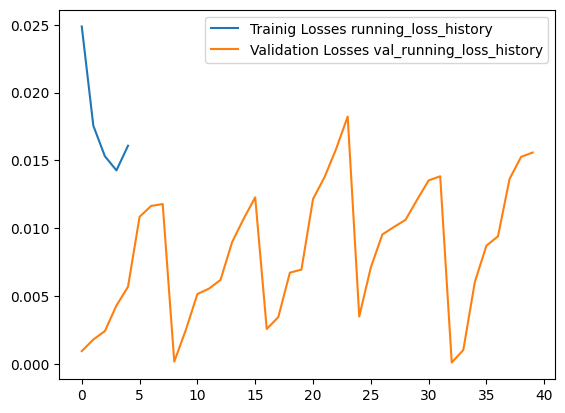

In [34]:
plt.plot(running_loss_history, label = 'Trainig Losses running_loss_history')
plt.plot(val_running_loss_history, label = 'Validation Losses val_running_loss_history')
plt.legend()
plt.show()

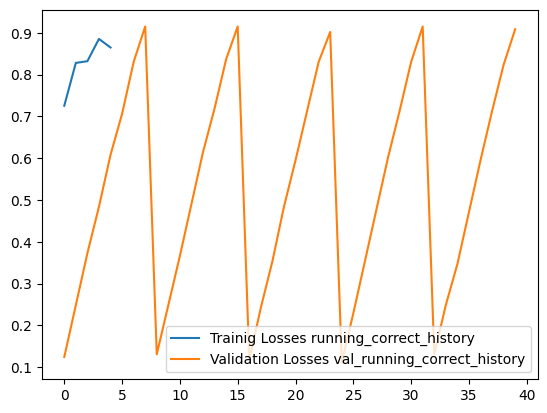

In [35]:
plt.plot(running_correct_history, label = 'Trainig Losses running_correct_history')
plt.plot(val_running_correct_history, label = 'Validation Losses val_running_correct_history')
plt.legend()
plt.show()

#### Test Model

In [36]:
import requests
import PIL.ImageOps
import PIL 
from PIL import Image

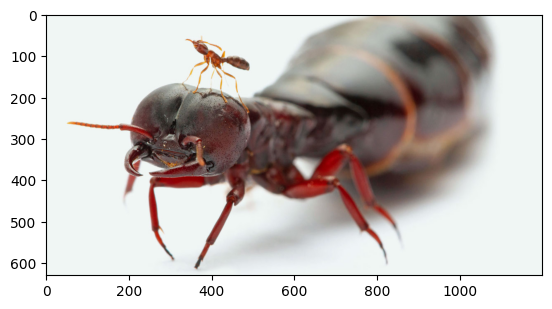

In [37]:
url = "https://d2r55xnwy6nx47.cloudfront.net/uploads/2023/01/AntsLifespan-byDanielKronauer-Social.jpg"
response = requests.get(url, stream = True)
if response:
    img = Image.open(response.raw)
    plt.imshow(img)

## Image Processing
#### Image To be Feeded Must be Black white and black color 

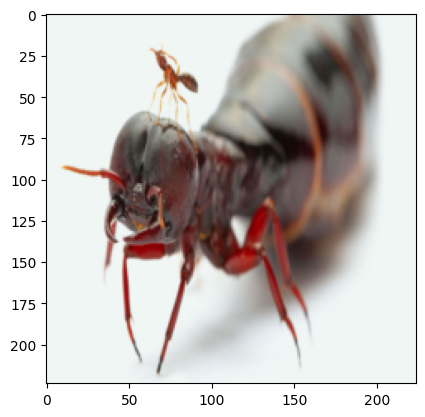

In [38]:
# img = PIL.ImageOps.invert(img.convert('RGB'))
# img =img.convert(mode ="L")
img = transform(img)
plt.imshow(im_convert(img))

#### Prediction

In [39]:
img = img.to(device).unsqueeze(0)
outputs = model(img)
_, pred = torch.max(outputs, 1)
print(training_classes[pred.item()])

ant


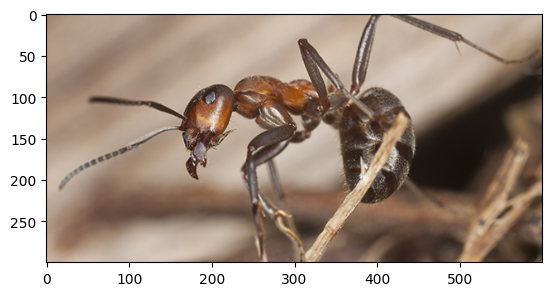

In [40]:
url = "https://www.nwf.org/-/media/NEW-WEBSITE/Shared-Folder/Wildlife/Invertebrates/invertebrate_wood-ants_600x300.jpg"
response = requests.get(url, stream = True)
if response:
    img = Image.open(response.raw)
    plt.imshow(img)

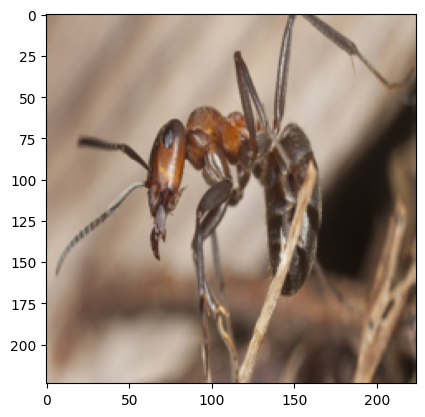

In [41]:
# img = PIL.ImageOps.invert(img.convert('RGB'))
# img =img.convert(mode ="L")
img = transform(img)
plt.imshow(im_convert(img))

In [95]:
img = img.to(device).unsqueeze(0)
outputs = model(img)
_, pred = torch.max(outputs, 1)
print(training_classes[pred.item()])

ant


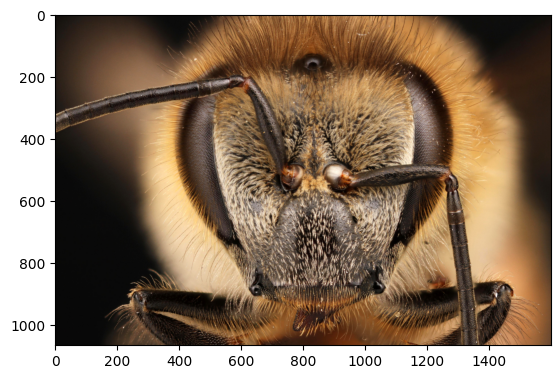

In [43]:
url = "https://www.sciencefriday.com/wp-content/uploads/2023/05/honeybee-closeup.jpg"
response = requests.get(url, stream = True)
if response:
    img = Image.open(response.raw)
    plt.imshow(img)

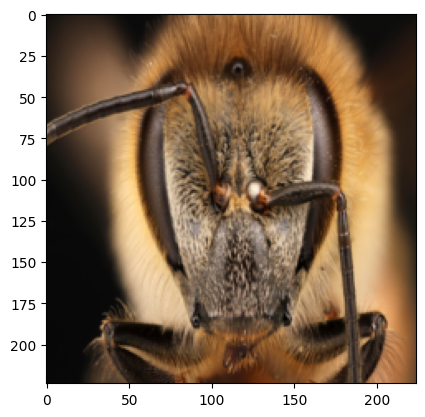

In [44]:
# img = PIL.ImageOps.invert(img.convert('RGB'))
# img =img.convert(mode ="L")
img = transform(img)
plt.imshow(im_convert(img))

In [45]:
img = img.to(device).unsqueeze(0)
outputs = model(img)
_, pred = torch.max(outputs, 1)
print(training_classes[pred.item()])

bee


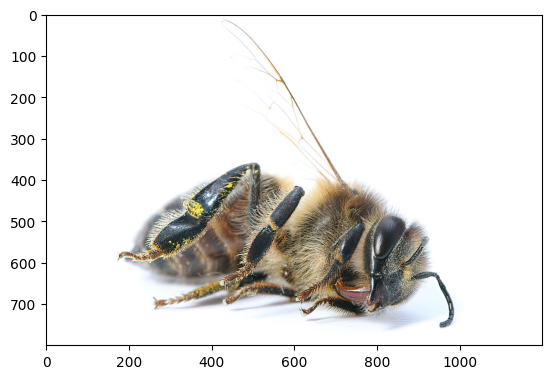

In [46]:
url = "https://www.honeybeesuite.com/wp-content/uploads/2018/09/Honey-bee-in-distress.jpg"
response = requests.get(url, stream = True)
if response:
    img = Image.open(response.raw)
    plt.imshow(img)

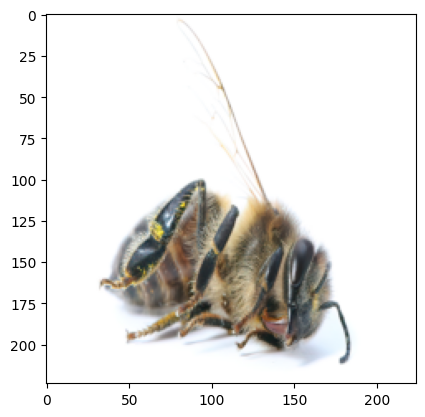

In [47]:
# img = PIL.ImageOps.invert(img.convert('RGB'))
# img =img.convert(mode ="L")
img = transform(img)
plt.imshow(im_convert(img))

In [48]:
img = img.to(device).unsqueeze(0)
outputs = model(img)
_, pred = torch.max(outputs, 1)
print(training_classes[pred.item()])

bee


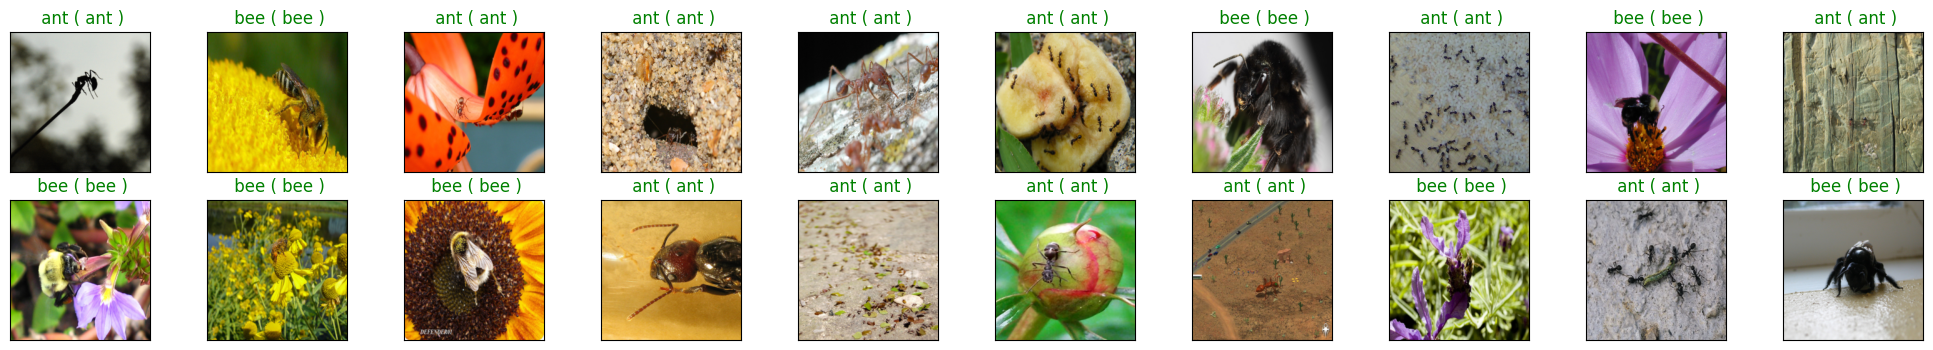

In [49]:
valdataIter = iter(validation_loader)
images, labels = next(valdataIter)
# images = images.view(images.shape[0], -1)
outputs = model(images)
_, preds = torch.max(outputs, 1)

fig = plt.figure(figsize = (25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks = [], yticks = [])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(f' {str(validtion_classes[preds[idx].item()])} ( {str(validtion_classes[labels[idx].item()])} )', color = ('green' if preds[idx] == labels[idx] else 'red'))